## Linear Regression Algorithms

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [8]:
# Reading data or import data
data = pd.read_csv("headbrain.csv")
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [23]:
print(data.shape)

(237, 4)


In [22]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [21]:
# Collecting X and Y values
X = data["Head Size(cm^3)"].values
Y = data["Brain Weight(grams)"].values

## Mean X & Y values

In [12]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

print("Mean_X: ", mean_X)
print("Mean_Y: ", mean_Y)

Mean_X:  3633.9915611814345
Mean_Y:  1282.873417721519


In [19]:
# Total number of values
m = len(X)
m

237

## Using the formula to calculate b1 & b2

In [16]:
numer = 0
denom = 0
for i in range(m):
    numer = numer + (X[i]-mean_X)*(Y[i]-mean_Y)
    denom = denom + (X[i] - mean_X)**2

In [17]:
b1 = numer / denom
b1

0.26342933948939945

In [18]:
b2 = mean_Y - (b1*mean_X)
b2

325.57342104944223

## Plotting values & Regression line

In [24]:
max_X = np.max(X)+100
max_X

4847

In [25]:
min_X = np.min(X)-100
min_X

2620

In [27]:
# Calculating line values x & y
X_x = np.linspace(min_X, max_X, 1000)
X_x

array([2620.        , 2622.22922923, 2624.45845846, 2626.68768769,
       2628.91691692, 2631.14614615, 2633.37537538, 2635.6046046 ,
       2637.83383383, 2640.06306306, 2642.29229229, 2644.52152152,
       2646.75075075, 2648.97997998, 2651.20920921, 2653.43843844,
       2655.66766767, 2657.8968969 , 2660.12612613, 2662.35535536,
       2664.58458458, 2666.81381381, 2669.04304304, 2671.27227227,
       2673.5015015 , 2675.73073073, 2677.95995996, 2680.18918919,
       2682.41841842, 2684.64764765, 2686.87687688, 2689.10610611,
       2691.33533534, 2693.56456456, 2695.79379379, 2698.02302302,
       2700.25225225, 2702.48148148, 2704.71071071, 2706.93993994,
       2709.16916917, 2711.3983984 , 2713.62762763, 2715.85685686,
       2718.08608609, 2720.31531532, 2722.54454454, 2724.77377377,
       2727.003003  , 2729.23223223, 2731.46146146, 2733.69069069,
       2735.91991992, 2738.14914915, 2740.37837838, 2742.60760761,
       2744.83683684, 2747.06606607, 2749.2952953 , 2751.52452

In [28]:
Y_y = b2 + b1*X_x
Y_y

array([1015.75829051, 1016.3455349 , 1016.93277928, 1017.52002366,
       1018.10726805, 1018.69451243, 1019.28175681, 1019.8690012 ,
       1020.45624558, 1021.04348996, 1021.63073435, 1022.21797873,
       1022.80522311, 1023.3924675 , 1023.97971188, 1024.56695626,
       1025.15420065, 1025.74144503, 1026.32868941, 1026.9159338 ,
       1027.50317818, 1028.09042256, 1028.67766695, 1029.26491133,
       1029.85215571, 1030.4394001 , 1031.02664448, 1031.61388886,
       1032.20113325, 1032.78837763, 1033.37562201, 1033.9628664 ,
       1034.55011078, 1035.13735516, 1035.72459955, 1036.31184393,
       1036.89908832, 1037.4863327 , 1038.07357708, 1038.66082147,
       1039.24806585, 1039.83531023, 1040.42255462, 1041.009799  ,
       1041.59704338, 1042.18428777, 1042.77153215, 1043.35877653,
       1043.94602092, 1044.5332653 , 1045.12050968, 1045.70775407,
       1046.29499845, 1046.88224283, 1047.46948722, 1048.0567316 ,
       1048.64397598, 1049.23122037, 1049.81846475, 1050.40570

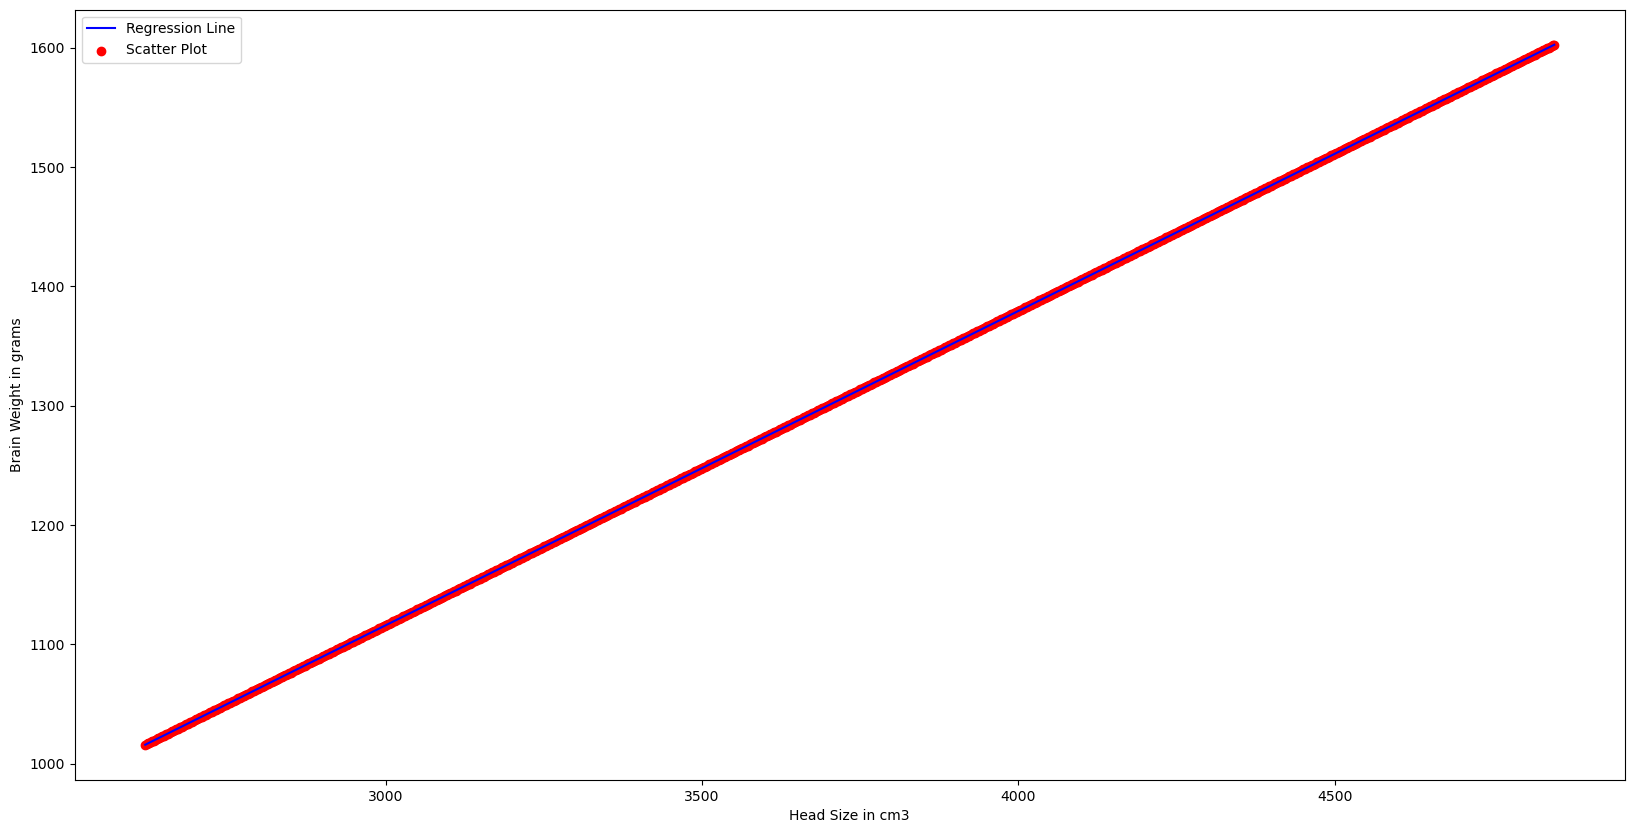

In [32]:
# Plotting Line
plotting = plt.plot(X_x, Y_y, color='Blue', label='Regression Line')

# Plotting scatter points
scatter_plot = plt.scatter(X_x, Y_y, color='Red', label='Scatter Plot')

plt.xlabel("Head Size in cm3")
plt.ylabel("Brain Weight in grams")
plt.legend()
plt.show()

In [35]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b2+b1*X[i]
    ss_t = ss_t + (Y[i]-mean_Y) ** 2
    ss_r = ss_r + (Y[i]-y_pred) ** 2
r_square = 1 - ss_r/ss_t
r_square

0.6393117199570003

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Can not use Rank 1 matrix in scikit learn
X = X.reshape((m,1))

# Creating Model
reg = LinearRegression()

# Fitting training data
reg = reg.fit(X,Y)

y_pred = reg.predict(X)

# Calculating R_Square score
r_square_score = reg.score(X,Y)
r_square_score

0.639311719957